In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import chess
from sarfa import core, OffenseDefenseBoardVisualization, SarfaBaseline, Engine, RemovalPerturber
from sarfa.utils import get_all_pos, read_fens
from IPython.display import Image, display
from collections import defaultdict

In [3]:
def offense_defense_saliency_algorithm(fen, action=None) -> tuple[dict[str, tuple[str, float]], chess.Move]:
    board = chess.Board(fen)

    saliency_results: dict[str, tuple[str, float]] = defaultdict(int)
    perturber = RemovalPerturber(board)
    saliency_calculator = SarfaBaseline(engine, board)
    optimal_move_original_board = action

    for perturbed_board, perturbed_position_str in perturber.process():
        sarfa_compute_result = saliency_calculator.compute(perturbed_board, 
        action, allow_defense=True)
        saliency = sarfa_compute_result.saliency
        dP = sarfa_compute_result.dP
        optimal_move = sarfa_compute_result.optimal_move


        if (optimal_move_original_board == None):
            optimal_move_original_board = chess.Move.from_uci(optimal_move)

        saliency_type = ""
        if dP < 0:
            saliency_type = "defensive"
            saliency = abs(saliency)
        else:
            saliency_type = "offensive"

        saliency_results[perturbed_position_str] = [saliency_type, saliency]

    return saliency_results, optimal_move_original_board


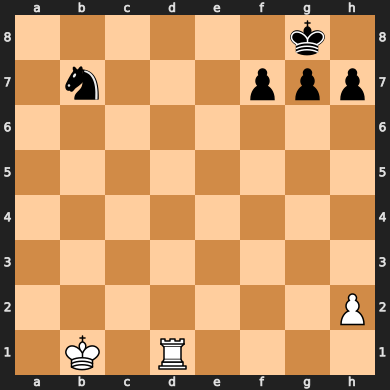

In [4]:
idx = 0
fens = read_fens('./test_fens/off_def_fens.txt')
FEN = fens[idx]
board = chess.Board(FEN)

engine = Engine("./stockfish_15_x64_avx2")
board_visualization = OffenseDefenseBoardVisualization(board)
board_visualization.only_board()

In [11]:
action = chess.Move.from_uci('d1d8')
saliency_results, optimal_move_original_board = offense_defense_saliency_algorithm(FEN, action=action)
saliency_results

defaultdict(int,
            {'b7': ['defensive', 0.7518626653204606],
             'd1': ['offensive', 1],
             'f7': ['defensive', 9.9163209662168e-07],
             'g7': ['defensive', 2.538937257389168e-07],
             'h2': ['defensive', 2.434407885749264e-07],
             'h7': ['defensive', 2.628590122691969e-07]})

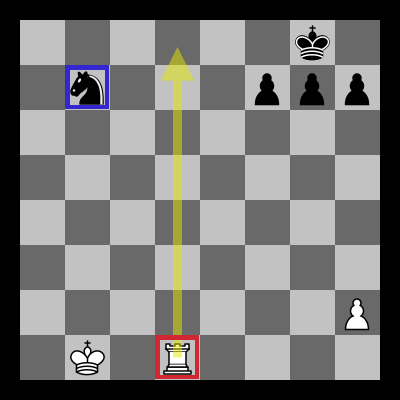

In [12]:
path = board_visualization.show_heatmap(saliency_results, optimal_move_original_board)
display(Image(path))